<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/0021_%E5%90%88%E5%B9%B6%E4%B8%A4%E4%B8%AA%E6%9C%89%E5%BA%8F%E9%93%BE%E8%A1%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 题目描述
将两个升序链表合并为一个新的 升序 链表并返回。新链表是通过拼接给定的两个链表的所有节点组成的。 


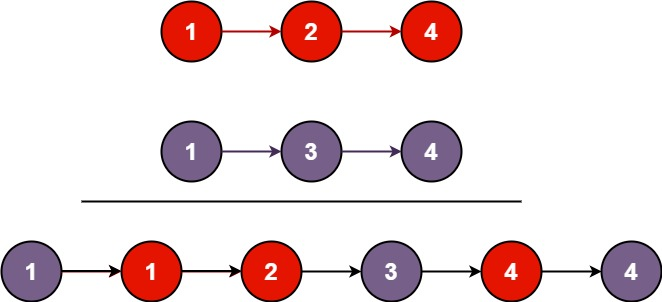

 



```
输入：l1 = [1,2,4], l2 = [1,3,4]
输出：[1,1,2,3,4,4]
示例 2：

输入：l1 = [], l2 = []
输出：[]
示例 3：

输入：l1 = [], l2 = [0]
输出：[0]


```



方法一：递归
思路

我们可以如下递归地定义两个链表里的 merge 操作（忽略边界情况，比如空链表等）：

{ \begin{array}{ll} list1[0] + merge(list1[1:], list2) & list1[0] < list2[0] \\ list2[0] + merge(list1, list2[1:]) & otherwise \end{array}
}.

​
也就是说，两个链表头部值较小的一个节点与剩下元素的 merge 操作结果合并。

**算法**

我们直接将以上递归过程建模，同时需要考虑边界情况。

如果 l1 或者 l2 一开始就是空链表 ，那么没有任何操作需要合并，所以我们只需要返回非空链表。否则，我们要判断 l1 和 l2 哪一个链表的头节点的值更小，然后递归地决定下一个添加到结果里的节点。如果两个链表有一个为空，递归结束。


[leetcode链接](https://leetcode-cn.com/problems/merge-two-sorted-lists/solution/he-bing-liang-ge-you-xu-lian-biao-by-leetcode-solu/)


## 递归

```
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def mergeTwoLists(self, l1: ListNode, l2: ListNode) -> ListNode:
        if l1 is None:
            return l2
        elif l2 is None:
            return l1
        elif l1.val < l2.val:
            l1.next = self.mergeTwoLists(l1.next, l2)
            return l1
        else:
            l2.next = self.mergeTwoLists(l1, l2.next)
            return l2

```



## 迭代


```
class Solution:
    def mergeTwoLists(self, l1, l2):
        prehead = ListNode(-1)

        prev = prehead
        while l1 and l2:
            if l1.val <= l2.val:
                prev.next = l1
                l1 = l1.next
            else:
                prev.next = l2
                l2 = l2.next            
            prev = prev.next

        # 合并后 l1 和 l2 最多只有一个还未被合并完，我们直接将链表末尾指向未合并完的链表即可
        prev.next = l1 if l1 is not None else l2

        return prehead.next
```




自己环境测试代码

In [4]:

class ListNode(object):
    def __init__(self,x):
        self.val=x
        self.next=None

'''
思路：
1、建立新节点
2、两个节点遍历，谁小就向新节点添加
3、合并剩余的节点
'''
def mergeTowList(head1,head2):

    ### 设置临时节点
    newHead=ListNode(0)
    pre=newHead

    '''
    开始合并
    '''
    while(head1 and head2):

        if head1.val>head2.val:
            pre.next=head2
            head2=head2.next
        else:
            pre.next = head1
            head1 = head1.next
        pre=pre.next


    '''
    合并其他没有进入的节点
    '''
    if head1:
        pre.next=head1

    if head2:
        pre.next=head2

    return newHead.next






if __name__=="__main__":
    head=ListNode(10)
    p1=ListNode(20)
    p2=ListNode(30)
    p3=ListNode(40)
    p4=ListNode(50)
    p5=ListNode(60)
    p6=ListNode(70)

    head.next=p1
    p1.next=p2
    p2.next=p3
    p3.next=p4
    p4.next=p5
    p5.next=p6

    head2 = ListNode(11)
    p11 = ListNode(21)
    p22 = ListNode(31)
    p33 = ListNode(41)
    p44 = ListNode(51)
    p55 = ListNode(73)
    p66 = ListNode(71)

    head2.next = p11
    p11.next = p22
    p22.next = p33
    p33.next = p44
    p44.next = p55
    p55.next = p66

    h=mergeTowList(head,head2)




In [6]:
while h:
    print(h.val)
    h=h.next

10
11
20
21
30
31
40
41
50
51
60
70
73
71
